In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmath

In [2]:
# Definindo parâmetros  
num_sources = 9  
num_receivers = 9  
source_positions = np.array([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])  # Posições das fontes  
receiver_positions = source_positions   # Posições dos receptores  
wavelength = 1.0  # Comprimento de onda  
PI = np.pi # Value of pi

In [3]:
# Calculando a onda resultante em cada receptor  
G = np.zeros((9, 9), dtype=complex)
gsr = -4*PI*5*wavelength

for i in range(9):
    for j in range(9):
        dist = np.sqrt((receiver_positions[i]-source_positions[j])**2 + 5**2)
        G[i][j] = (-1/(4*PI))*np.exp(1j*dist*2*PI, dtype=complex)/dist
gsrG = gsr*G
print("g(SR)G(SR)")
print(gsrG)

g(SR)G(SR)
[[ 1.        -1.22464680e-15j  0.98284738+1.55274077e-01j
   0.79684213+5.71472727e-01j  0.17857269+9.41032937e-01j
  -0.69709609+6.13291129e-01j -0.75467768-4.80064164e-01j
   0.41758718-7.48942629e-01j  0.6527155 +4.95079207e-01j
  -0.64062376+4.46494453e-01j]
 [ 0.98284738+1.55274077e-01j  1.        -1.22464680e-15j
   0.98284738+1.55274077e-01j  0.79684213+5.71472727e-01j
   0.17857269+9.41032937e-01j -0.69709609+6.13291129e-01j
  -0.75467768-4.80064164e-01j  0.41758718-7.48942629e-01j
   0.6527155 +4.95079207e-01j]
 [ 0.79684213+5.71472727e-01j  0.98284738+1.55274077e-01j
   1.        -1.22464680e-15j  0.98284738+1.55274077e-01j
   0.79684213+5.71472727e-01j  0.17857269+9.41032937e-01j
  -0.69709609+6.13291129e-01j -0.75467768-4.80064164e-01j
   0.41758718-7.48942629e-01j]
 [ 0.17857269+9.41032937e-01j  0.79684213+5.71472727e-01j
   0.98284738+1.55274077e-01j  1.        -1.22464680e-15j
   0.98284738+1.55274077e-01j  0.79684213+5.71472727e-01j
   0.17857269+9.41032937e-

In [4]:
print("Sum of the modulus squared of gsrG matrix elements")
print((np.absolute(gsrG)**2).sum())

Sum of the modulus squared of gsrG matrix elements
72.64882724644687


In [5]:
G_a = np.matrix(G).getH()
print("Hermitian Adjoint of G")
print(G_a)

Hermitian Adjoint of G
[[-0.01591549-1.94908592e-17j -0.0156425 +2.47126369e-03j
  -0.01268214+9.09527094e-03j -0.00284207+1.49770044e-02j
   0.01109463+9.76083147e-03j  0.01201107-7.64045848e-03j
  -0.00664611-1.19197921e-02j -0.01038829+7.87943030e-03j
   0.01019584+7.10617993e-03j]
 [-0.0156425 +2.47126369e-03j -0.01591549-1.94908592e-17j
  -0.0156425 +2.47126369e-03j -0.01268214+9.09527094e-03j
  -0.00284207+1.49770044e-02j  0.01109463+9.76083147e-03j
   0.01201107-7.64045848e-03j -0.00664611-1.19197921e-02j
  -0.01038829+7.87943030e-03j]
 [-0.01268214+9.09527094e-03j -0.0156425 +2.47126369e-03j
  -0.01591549-1.94908592e-17j -0.0156425 +2.47126369e-03j
  -0.01268214+9.09527094e-03j -0.00284207+1.49770044e-02j
   0.01109463+9.76083147e-03j  0.01201107-7.64045848e-03j
  -0.00664611-1.19197921e-02j]
 [-0.00284207+1.49770044e-02j -0.01268214+9.09527094e-03j
  -0.0156425 +2.47126369e-03j -0.01591549-1.94908592e-17j
  -0.0156425 +2.47126369e-03j -0.01268214+9.09527094e-03j
  -0.00284207+

In [6]:
g2G2 = (gsr**2)*(G*G_a)
print(g2G2)

[[ 7.54732878-2.32278571e-17j  3.95106291+4.71859969e+00j
   0.03130074+2.32104434e+00j  0.12288089-1.15687141e+00j
   0.6019284 -1.63425648e+00j  0.07389739-9.68661270e-02j
   0.17313989+1.10712210e+00j  0.48727538+5.38308166e-01j
  -0.34593366+1.07006465e-16j]
 [ 3.95106291-4.71859969e+00j  7.9276717 +2.04830053e-18j
   5.02006695+3.67206479e+00j  0.95484345+1.71722037e+00j
  -0.73614842-1.22338403e+00j -0.9347535 -1.36124788e+00j
   0.0622624 +2.14908661e-02j  1.14684917+6.07403207e-18j
   0.48727538-5.38308166e-01j]
 [ 0.03130074-2.32104434e+00j  5.02006695-3.67206479e+00j
   8.21806922-4.77834614e-17j  5.79835615+2.32867433e+00j
   1.48010668+8.90432666e-01j -1.46047324-5.26703992e-01j
  -1.61244573+1.49904485e-16j  0.0622624 -2.14908661e-02j
   0.17313989-1.10712210e+00j]
 [ 0.12288089+1.15687141e+00j  0.95484345-1.71722037e+00j
   5.79835615-2.32867433e+00j  8.40020629-4.48730768e-17j
   6.20660419+7.97487976e-01j  1.64400393+2.60893869e-17j
  -1.46047324+5.26703992e-01j -0.9347

In [7]:
U, S, Vh = np.linalg.svd(g2G2)

# Vh contém os vetores singulares à direita (modos associados às fontes)
print("\nVetores singulares à direita (Vh):")
print(Vh[:3])

# S contém os valores singulares (intensidade dos modos)
print("\nValores singulares (S):")
print(S)


Vetores singulares à direita (Vh):
[[-1.71105043e-01+0.00000000e+00j -2.05460405e-01-2.98869936e-01j
   2.45799963e-02-4.69328891e-01j  1.46093545e-01-3.11398041e-01j
  -8.39606162e-16+1.11022302e-15j -1.46093545e-01+3.11398041e-01j
  -2.45799963e-02+4.69328891e-01j  2.05460405e-01+2.98869936e-01j
   1.71105043e-01-3.58220398e-16j]
 [-1.23795169e-01+0.00000000e+00j -3.40617661e-02-1.81566336e-01j
   2.56407661e-01-1.47660738e-01j  4.54188464e-01+8.77292117e-02j
   5.00968256e-01+2.16939920e-01j  4.54188464e-01+8.77292117e-02j
   2.56407661e-01-1.47660738e-01j -3.40617661e-02-1.81566336e-01j
  -1.23795169e-01+6.57026517e-16j]
 [-3.77240117e-01+0.00000000e+00j -3.10903646e-01-3.19282983e-01j
  -1.08951982e-01-2.35979670e-01j -1.74523105e-01+6.20599705e-02j
  -2.77070764e-01+1.94094802e-01j -1.74523105e-01+6.20599705e-02j
  -1.08951982e-01-2.35979670e-01j -3.10903646e-01-3.19282983e-01j
  -3.77240117e-01-1.42247325e-16j]]

Valores singulares (S):
[2.07333872e+01 2.03928955e+01 1.90922707

# Modo 1

In [191]:
# Amplitudes e fases fixas para as fontes
h_j = []
for i in range(9):
    h_j.append(Vh[0,i])
h_j = np.array(h_j)

In [192]:
# Ajuste de Fase
center = (num_sources)//2
phase_center = (np.angle(h_j[center])+2*PI)%(2*PI)
# phase_center = np.angle(h_j[center])
print(h_j[center])
print(phase_center)
h_j = h_j * np.exp(-1j*phase_center)

# Garantir simetria de fase ao redor do centro
source_phases = -(np.angle(h_j)+2*PI)%(2*PI)
source_phases[4] = 0
source_phases[:4] -= PI
# source_phases = np.angle(h_j)

source_amplitudes = np.real(h_j)
# source_phases[:center] = source_phases[:center][::-1]
# source_phases = np.array([np.angle(h) for h in h_j_rotated])

(-8.396061623727746e-16+1.1102230246251565e-15j)
2.218285450338225


In [193]:
# Define the grid for x and y
y = np.linspace(-2, 2, 500)  # Adjust range and resolution as needed
z = np.linspace(0.06, 5.1, 500)
Y, Z = np.meshgrid(y, z)
wave = np.zeros((500, 500), dtype=complex)

for i in range(num_sources):
    dists = np.sqrt(np.power(Y-source_positions[i], 2) + (np.power(Z,2)))
    wave += np.exp(1j*2*PI*dists)*h_j[i]/dists
    
wave = -(1/(4*PI))*wave 
wave = wave * np.sqrt(np.abs(Z))
wave_real = np.real(wave)
wave_real = np.flip(wave_real, axis=1)
for i in range(9):
    idx = 499*i//8
    source_amplitudes[i] = wave_real[0, idx]

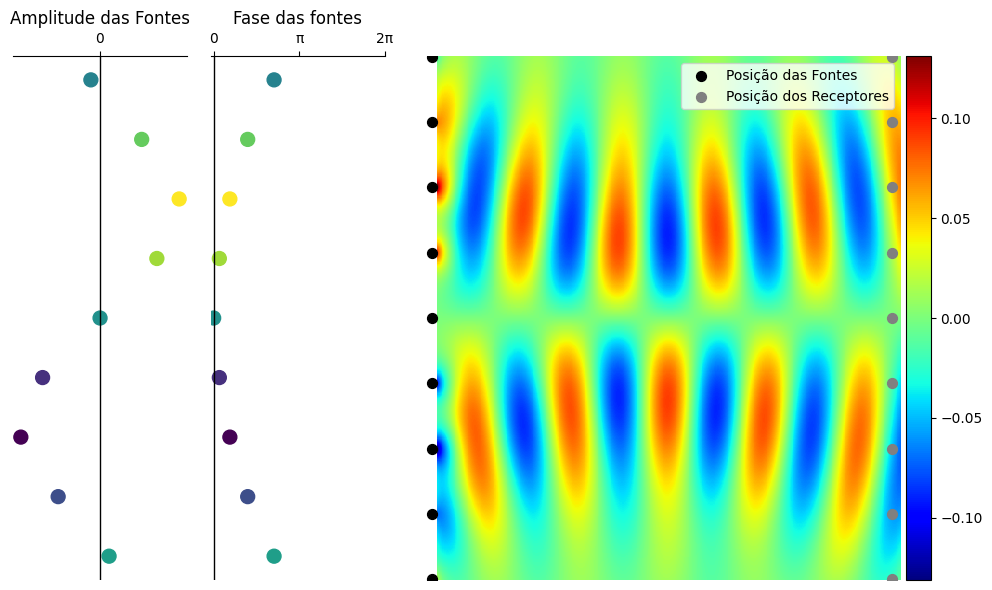

In [194]:
 # Plotting  
w = [1, 1, 3]
fig, ax = plt.subplots(1, 3, figsize=(10, 6), gridspec_kw={'width_ratios': w})  

# Plot Source Relative Amplitude
ax[0].scatter(source_amplitudes, source_positions, c=source_amplitudes, cmap='viridis', s=100)  
ax[0].set_title('Amplitude das Fontes')  
#ax[0].axis('off')
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].axvline(0, color='black', linewidth=1, linestyle='-', label='y=0')
ax[0].set_xticks([0])
ax[0].set_yticks([])
ax[0].xaxis.set_ticks_position('top')

# Plot Source Relative Phases  
ax[1].scatter(source_phases, source_positions, c=source_amplitudes, cmap='viridis', s=100)  
ax[1].set_title('Fase das fontes')  
ax[1].set_xticks([0, PI, 2*PI])
ax[1].set_xticklabels(["0", "π", "2π"])
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
ax[1].axvline(0, color='black', linewidth=1, linestyle='-', label='y=0')
ax[1].set_yticks([])
ax[1].xaxis.set_ticks_position('top')


# Plot Resulting Wave  
# ax[2].legend()
im = ax[2].pcolormesh(Z, Y, wave_real, shading='auto', cmap='jet')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[2].scatter(np.zeros(9), source_positions, c='black', s=50, label='Posição das Fontes')
ax[2].scatter(np.ones(9)+4, source_positions, c='gray', s=50, label='Posição dos Receptores')
ax[2].spines["right"].set_visible(False)
ax[2].spines["left"].set_visible(False)
ax[2].spines["bottom"].set_visible(False)
ax[2].spines["top"].set_visible(False)
ax[2].legend()
ax[2].set_yticks([])
ax[2].set_xticks([])

plt.tight_layout()  
plt.show()  

# Modo 2

In [183]:
# Amplitudes e fases fixas para as fontes
h_j = []
for i in range(9):
    h_j.append(Vh[1,i])
h_j = np.array(h_j)

In [184]:
# Ajuste de Fase
center = (num_sources)//2
phase_center = (np.angle(h_j[center])+2*PI)%(2*PI)
# phase_center = np.angle(h_j[center])
print(h_j[center])
print(phase_center)
h_j = h_j * np.exp(-1j*phase_center)

# Garantir simetria de fase ao redor do centro
source_phases = -(np.angle(h_j)+2*PI)%(2*PI)
# source_phases = np.angle(h_j)

source_amplitudes = np.real(h_j)
# source_phases[:center] = source_phases[:center][::-1]
# source_phases = np.array([np.angle(h) for h in h_j_rotated])

(0.5009682555264019+0.2169399195765412j)
0.408661895347497


In [185]:
# Define the grid for x and y
y = np.linspace(-2, 2, 500)  # Adjust range and resolution as needed
z = np.linspace(0.06, 5.1, 500)
Y, Z = np.meshgrid(y, z)
wave = np.zeros((500, 500), dtype=complex)

for i in range(num_sources):
    dists = np.sqrt(np.power(Y-source_positions[i], 2) + (np.power(Z,2)))
    wave += np.exp(1j*2*PI*dists)*h_j[i]/dists

wave = -(1/(4*PI))*wave 
wave = wave * np.sqrt(np.real(Z))
wave_real = np.real(wave)
for i in range(9):
    idx = 499*i//8
    source_amplitudes[i] = wave_real[0, idx]

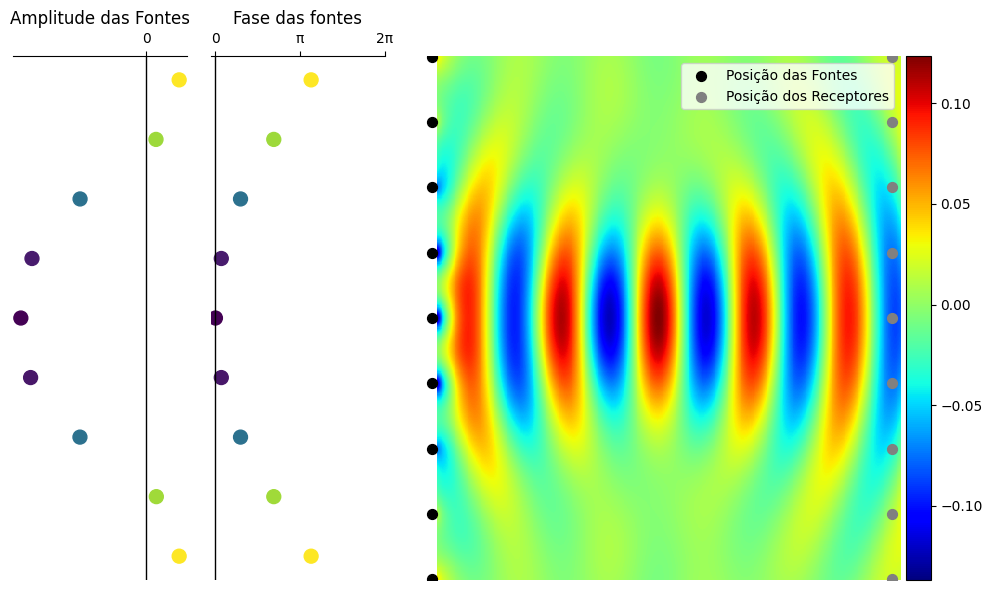

In [186]:
 # Plotting  
w = [1, 1, 3]
fig, ax = plt.subplots(1, 3, figsize=(10, 6), gridspec_kw={'width_ratios': w})  

# Plot Source Relative Amplitude
ax[0].scatter(source_amplitudes, source_positions, c=source_amplitudes, cmap='viridis', s=100)  
ax[0].set_title('Amplitude das Fontes')  
#ax[0].axis('off')
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].axvline(0, color='black', linewidth=1, linestyle='-', label='y=0')
ax[0].set_xticks([0])
ax[0].set_yticks([])
ax[0].xaxis.set_ticks_position('top')

# Plot Source Relative Phases  
ax[1].scatter(source_phases, source_positions, c=source_amplitudes, cmap='viridis', s=100)  
ax[1].set_title('Fase das fontes')  
ax[1].set_xticks([0, PI, 2*PI])
ax[1].set_xticklabels(["0", "π", "2π"])
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
ax[1].axvline(0, color='black', linewidth=1, linestyle='-', label='y=0')
ax[1].set_yticks([])
ax[1].xaxis.set_ticks_position('top')


# Plot Resulting Wave  
# ax[2].legend()
im = ax[2].pcolormesh(Z, Y, wave_real, shading='auto', cmap='jet')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[2].scatter(np.zeros(9), source_positions, c='black', s=50, label='Posição das Fontes')
ax[2].scatter(np.ones(9)+4, source_positions, c='gray', s=50, label='Posição dos Receptores')
ax[2].spines["right"].set_visible(False)
ax[2].spines["left"].set_visible(False)
ax[2].spines["bottom"].set_visible(False)
ax[2].spines["top"].set_visible(False)
ax[2].legend()
ax[2].set_yticks([])
ax[2].set_xticks([])

plt.tight_layout()  
plt.show()  

# Modo 3

In [187]:
# Amplitudes e fases fixas para as fontes
h_j = []
for i in range(9):
    h_j.append(Vh[2,i])
    #h_j[i] = cmath.rect(amp, -ang)
h_j = np.array(h_j)

In [188]:
# Ajuste de Fase
center = (num_sources)//2
phase_center = (np.angle(h_j[center])+2*PI)%(2*PI)
# phase_center = np.angle(h_j[center])
print(h_j[center])
print(phase_center)
h_j = h_j * np.exp(-1j*phase_center)
# Garantir simetria de fase ao redor do centro


# Rotation
rotation_angle = np.pi / 8  # Adjust as needed
relative_positions = np.abs(np.arange(len(h_j)) - center)
phase_shifts = np.exp(1j * rotation_angle * relative_positions)

# Apply the rotation
h_j_rotated = h_j * phase_shifts

source_amplitudes = np.real(h_j)
# source_phases = (np.angle(h_j)+2*PI)%(2*PI)
source_phases = -np.angle(h_j)
print(source_phases)
# source_phases[:center] = source_phases[:center][::-1]
# source_phases = np.array([np.angle(h) for h in h_j_rotated])

(-0.27707076370878647+0.19409480219254432j)
2.5305148981371985
[-6.11077755e-01 -1.40977173e+00 -1.74933255e+00 -2.69425076e-01
  3.59996944e-16 -2.69425076e-01 -1.74933255e+00 -1.40977173e+00
 -6.11077755e-01]


In [189]:
# Define the grid for x and y
y = np.linspace(-2, 2, 500)  # Adjust range and resolution as needed
z = np.linspace(0.06, 5.1, 500)
Y, Z = np.meshgrid(y, z)
wave = np.zeros((500, 500), dtype=complex)

for i in range(num_sources):
    dists = np.sqrt(np.power(Y-source_positions[i], 2) + (np.power(Z,2)))
    wave += np.exp(1j*2*PI*dists)*h_j[i]/dists

wave = -(1/(4*PI))*wave 
wave = wave * np.sqrt(np.abs(Z))
wave_real = np.real(wave)
for i in range(9):
    idx = 499*i//8
    source_amplitudes[i] = wave_real[0, idx]

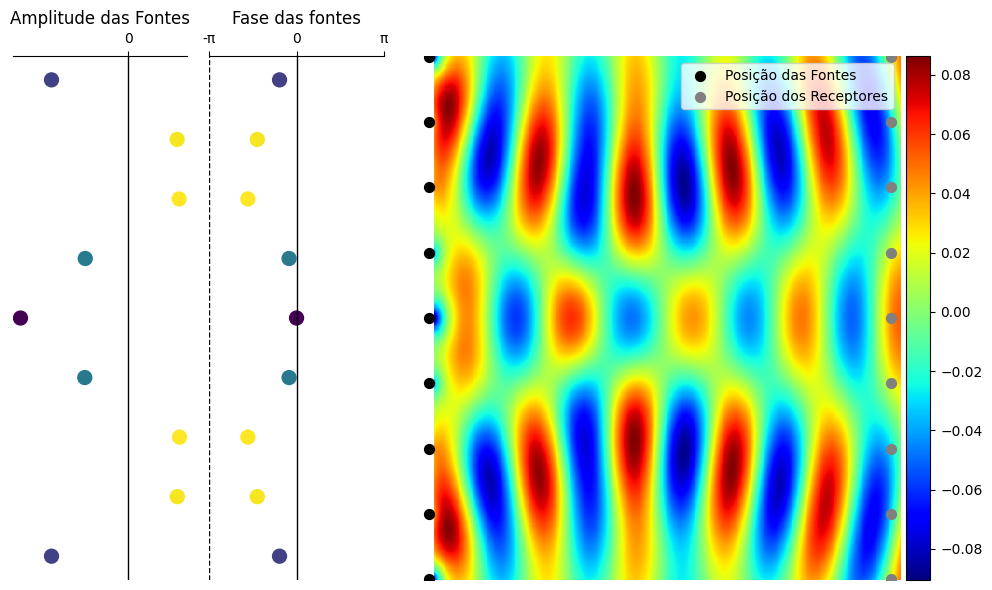

In [190]:
 # Plotting  
w = [1, 1, 3]
fig, ax = plt.subplots(1, 3, figsize=(10, 6), gridspec_kw={'width_ratios': w})  

# Plot Source Relative Amplitude
ax[0].scatter(source_amplitudes, source_positions, c=source_amplitudes, cmap='viridis', s=100)  
ax[0].set_title('Amplitude das Fontes')  
#ax[0].axis('off')
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].axvline(0, color='black', linewidth=1, linestyle='-', label='y=0')
ax[0].set_xticks([0])
ax[0].set_yticks([])
ax[0].xaxis.set_ticks_position('top')

# Plot Source Relative Phases  
ax[1].scatter(source_phases, source_positions, c=source_amplitudes, cmap='viridis', s=100)  
ax[1].set_title('Fase das fontes')  
ax[1].set_xticks([-PI, 0, PI])
ax[1].set_xticklabels(["-π", "0", "π"])
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
ax[1].axvline(-PI, color='black', linewidth=1, linestyle='--', label='y=0')
ax[1].axvline(0, color='black', linewidth=1, linestyle='-', label='y=0')
ax[1].set_yticks([])
ax[1].xaxis.set_ticks_position('top')


# Plot Resulting Wave  
# ax[2].legend()
im = ax[2].pcolormesh(Z, Y, wave_real, shading='auto', cmap='jet')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[2].scatter(np.zeros(9), source_positions, c='black', s=50, label='Posição das Fontes')
ax[2].scatter(np.ones(9)+4, source_positions, c='gray', s=50, label='Posição dos Receptores')
ax[2].spines["right"].set_visible(False)
ax[2].spines["left"].set_visible(False)
ax[2].spines["bottom"].set_visible(False)
ax[2].spines["top"].set_visible(False)
ax[2].legend()
ax[2].set_yticks([])
ax[2].set_xticks([])

plt.tight_layout()  
plt.show()  